## Anova extra lab

Load the framingham dataset from /datasets/framingham/

In [1]:
framingham_data=read.csv("../../../datasets/framingham/framingham.csv")
head(framingham_data)

male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,39,4,0,0,0,0,0,0,195,106.0,70,26.97,80,77,0
0,46,2,0,0,0,0,0,0,250,121.0,81,28.73,95,76,0
1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70,0
0,61,3,1,30,0,0,1,0,225,150.0,95,28.58,65,103,1
0,46,3,1,23,0,0,0,0,285,130.0,84,23.10,85,85,0
0,43,2,0,0,0,0,1,0,228,180.0,110,30.30,77,99,0


In [2]:
str(framingham_data)

'data.frame':	4240 obs. of  16 variables:
 $ male           : int  1 0 1 0 0 0 0 0 1 1 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ education      : int  4 2 1 3 3 2 1 2 1 1 ...
 $ currentSmoker  : int  0 0 1 1 1 0 0 1 0 1 ...
 $ cigsPerDay     : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : int  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : int  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : int  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : int  0 0 0 1 0 0 1 0 0 0 ...


### One way between ANOVA

Frame null hypothesis as

$H_o: $ No significant difference exist among males and females regarding smoking habit

$H_1: $ Significant difference exist among males and females regarding smoking habit

Use aov() function in R to test the null hypothesis whether to reject or fail to reject the null hypothesis.

Plot a graph to compare the means of the variable of interest across groups. Create side-by-side boxplots of measurements organized in groups. The independent variable should be a factor to create group wise plots. Convert the variable male into a factor. 

In [3]:
framingham_data$male=as.factor(framingham_data$male)

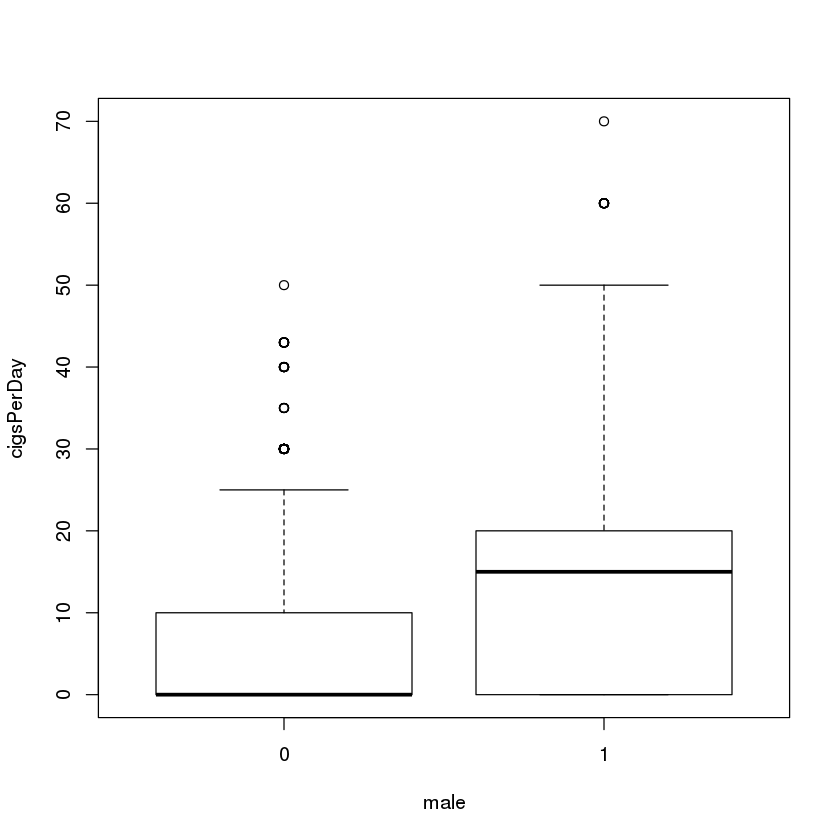

In [4]:
plot(cigsPerDay ~ male, data=framingham_data)

From the plot it appears average number of cigarettes for males are higher than females.

In [5]:
# General form for aov() is aov(response ~ factor, data=data_name)
# where response represents the response variable and factor the variable that separates the data into groups. 
# Both variables should be contained in the dataframe called data_name.

fit <- aov(cigsPerDay ~ male, data=framingham_data)
summary(fit)

              Df Sum Sq Mean Sq F value Pr(>F)    
male           1  60190   60190   470.7 <2e-16 ***
Residuals   4209 538241     128                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
29 observations deleted due to missingness

According to above results the F-statistic is 470.7 with a p-value almost equal to 0. Null hypothesis that there is no difference in smoking habits of males and females can be clearly rejected.

In [6]:
# Show the means
# model.tables() computes summary tables for model fits, especially complex aov fits.
# type = "means" give tables of the mean response for each combinations of levels of the factors in a term.

model.tables(fit, "means")

Tables of means
Grand mean
         
9.005937 

 male 
          0       1
       5.73   13.37
rep 2405.00 1806.00

**Reference: **[model.tables](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/model.tables.html)

In [7]:
# tapply(framingham_data$cigsPerDay, framingham_data$male, mean)

### Two way between ANOVA

TenYearCHD is explained by male, totChol and also by the interaction between them.

In [8]:
# 2x2 between:
# Independent variable: male
# Independent variable: totChol
# Dependent variable: TenYearCHD

# There are two different ways of performing 2-way anova. Below two calls are equivalent
fit2 <- aov(TenYearCHD ~ male*totChol, data=framingham_data)
summary(fit2)

               Df Sum Sq Mean Sq F value   Pr(>F)    
male            1    4.3   4.266  33.676 6.99e-09 ***
totChol         1    4.3   4.254  33.580 7.34e-09 ***
male:totChol    1    0.0   0.000   0.003    0.954    
Residuals    4186  530.2   0.127                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
50 observations deleted due to missingness

### Multiple comparisons

The ANOVA F-test tells whether there are significant differences in the K population means. It does not tell us anything about  how they differ. pairwise.t.test function computes the pair-wise comparisons between group means with corrections for multiple testing. Its Usage is : 

**pairwise.t.test(reponse, factor, p.adjust = method, alternative = c("two.sided","less", "greater"))**


Here, p.adjust is the correction method (e.g., “Bonferroni”).

**Reference: **[pairwise.t.test](http://stat.ethz.ch/R-manual/R-devel/library/stats/html/pairwise.t.test.html)

In [9]:
str(framingham_data)

'data.frame':	4240 obs. of  16 variables:
 $ male           : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 1 1 2 2 ...
 $ age            : int  39 46 48 61 46 43 63 45 52 43 ...
 $ education      : int  4 2 1 3 3 2 1 2 1 1 ...
 $ currentSmoker  : int  0 0 1 1 1 0 0 1 0 1 ...
 $ cigsPerDay     : int  0 0 20 30 23 0 0 20 0 30 ...
 $ BPMeds         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 0 0 1 0 1 0 0 1 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : int  195 250 245 225 285 228 205 313 260 225 ...
 $ sysBP          : num  106 121 128 150 130 ...
 $ diaBP          : num  70 81 80 95 84 110 71 71 89 107 ...
 $ BMI            : num  27 28.7 25.3 28.6 23.1 ...
 $ heartRate      : int  80 95 75 65 85 77 60 79 76 93 ...
 $ glucose        : int  77 76 70 103 85 99 85 78 79 88 ...
 $ TenYearCHD     : int  0 0 0 1 0 0 1 0 0 0 ...


In [10]:
framingham_data$cigsPerDay=as.numeric(framingham_data$cigsPerDay)
framingham_data$male=as.numeric(framingham_data$male)

In [11]:
pairwise.t.test(framingham_data$male, framingham_data$currentSmoker, p.adjust="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  framingham_data$male and framingham_data$currentSmoker 

  0     
1 <2e-16

P value adjustment method: bonferroni 